# Libraries 📚

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import missingno as msno

import seaborn as sns

In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Our data 👀

In [4]:
walmart_df = pd.read_csv("Walmart_Store_sales.csv")
walmart_df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833


Exploration🧐

In [4]:
walmart_df.describe(include= 'all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [5]:
walmart_df.shape

(150, 8)

In [6]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


DOUBLONS

In [7]:
# dduplicates?
walmart_df.duplicated().sum()

0

In [5]:
# Dealing with date


# Convert 'date' column to datetime format
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'], format='%d-%m-%Y')
#walmart_df.set_index('Date', inplace=True)

walmart_df["Day"]= pd.DatetimeIndex(walmart_df['Date']).day
walmart_df["Month"]= pd.DatetimeIndex(walmart_df['Date']).month
walmart_df["Year"]= pd.DatetimeIndex(walmart_df['Date']).year
walmart_df["Day_of_week"]= pd.DatetimeIndex(walmart_df['Date']).dayofweek
walmart_df["Day_name"]= pd.DatetimeIndex(walmart_df['Date']).day_name()
walmart_df["Is_weekend"]= pd.DatetimeIndex(walmart_df['Day_of_week']).isin([5, 6]).astype(int)




In [9]:
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Day_of_week,Day_name,Is_weekend
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,18.0,2.0,2011.0,4.0,Friday,0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,25.0,3.0,2011.0,4.0,Friday,0
2,17.0,2012-07-27,NaN,0.0,NaN,NaN,130.719581,5.936,27.0,7.0,2012.0,4.0,Friday,0
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN,NaN,0
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,28.0,5.0,2010.0,4.0,Friday,0


# EDA

In [7]:
walmart_df.dropna(subset=['Weekly_Sales'], inplace=True)

Target

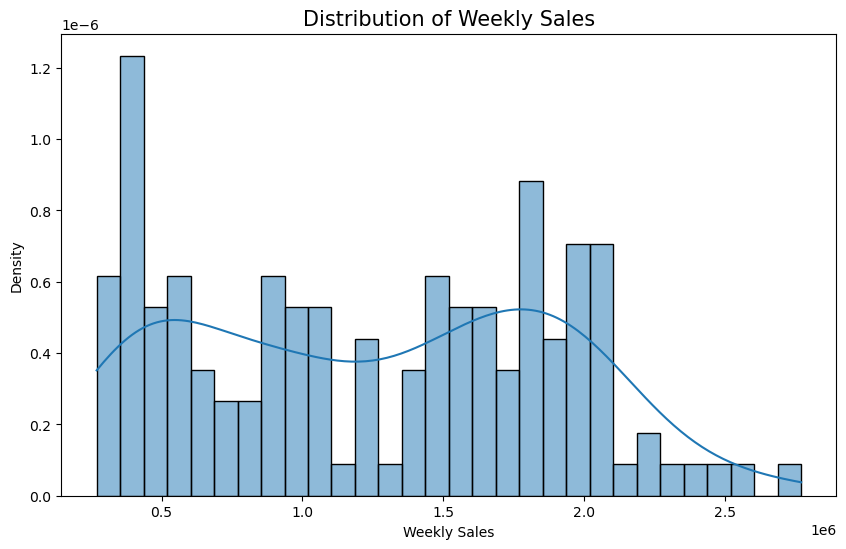

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(walmart_df['Weekly_Sales'], kde=True, stat="density", bins=30)
plt.title('Distribution of Weekly Sales', fontsize=15)
plt.xlabel('Weekly Sales')
plt.ylabel('Density')
plt.show()

numerical features distibution

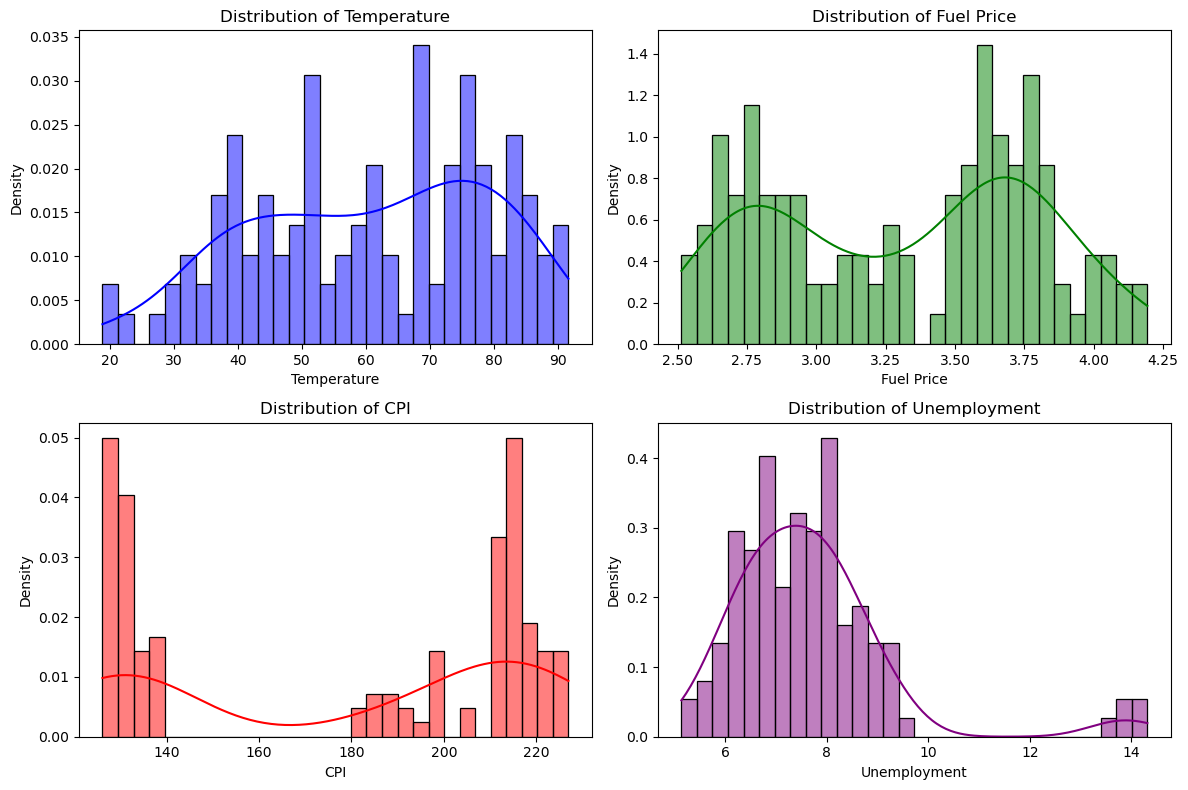

In [9]:

plt.figure(figsize=(12, 8))

# Temperature
plt.subplot(2, 2, 1)
sns.histplot(walmart_df['Temperature'], kde=True, stat="density", bins=30, color='blue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Density')

# Fuel Price
plt.subplot(2, 2, 2)
sns.histplot(walmart_df['Fuel_Price'], kde=True, stat="density", bins=30, color='green')
plt.title('Distribution of Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Density')

# CPI
plt.subplot(2, 2, 3)
sns.histplot(walmart_df['CPI'], kde=True, stat="density", bins=30, color='red')
plt.title('Distribution of CPI')
plt.xlabel('CPI')
plt.ylabel('Density')

# Unemployment
plt.subplot(2, 2, 4)
sns.histplot(walmart_df['Unemployment'], kde=True, stat="density", bins=30, color='purple')
plt.title('Distribution of Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Density')


plt.tight_layout()
plt.show()


Weekly sales

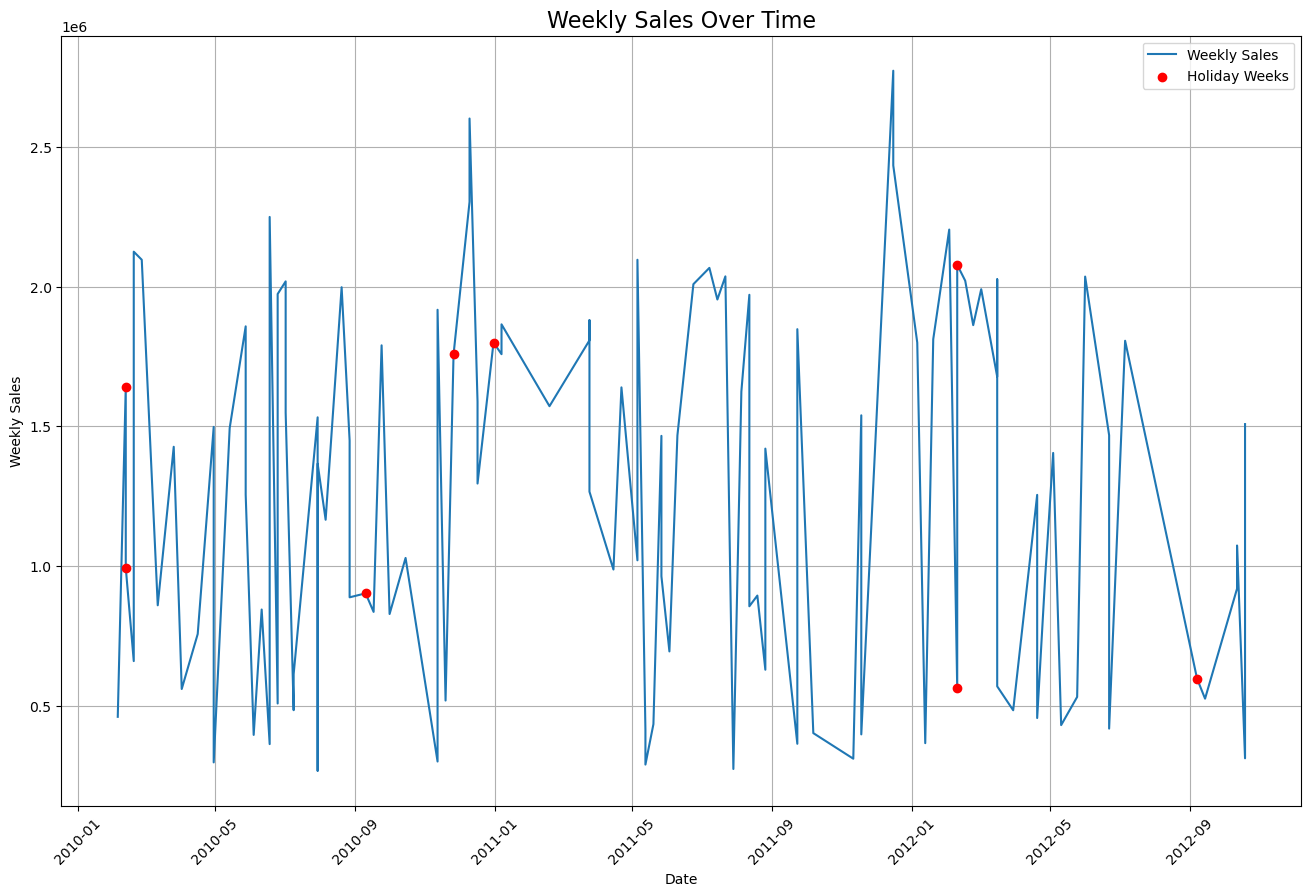

In [10]:
# Weekly_Sales over time
walmart_df = walmart_df.sort_values(by="Date")
plt.figure(figsize=(16, 10))
plt.plot(walmart_df['Date'], walmart_df['Weekly_Sales'], label='Weekly Sales')

# holidays
holiday_sales = walmart_df[walmart_df['Holiday_Flag'] == 1]
plt.scatter(holiday_sales['Date'], holiday_sales['Weekly_Sales'], color='red', label='Holiday Weeks', zorder=5)

plt.title('Weekly Sales Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

### Monthly sales by month

<Figure size 1400x800 with 0 Axes>

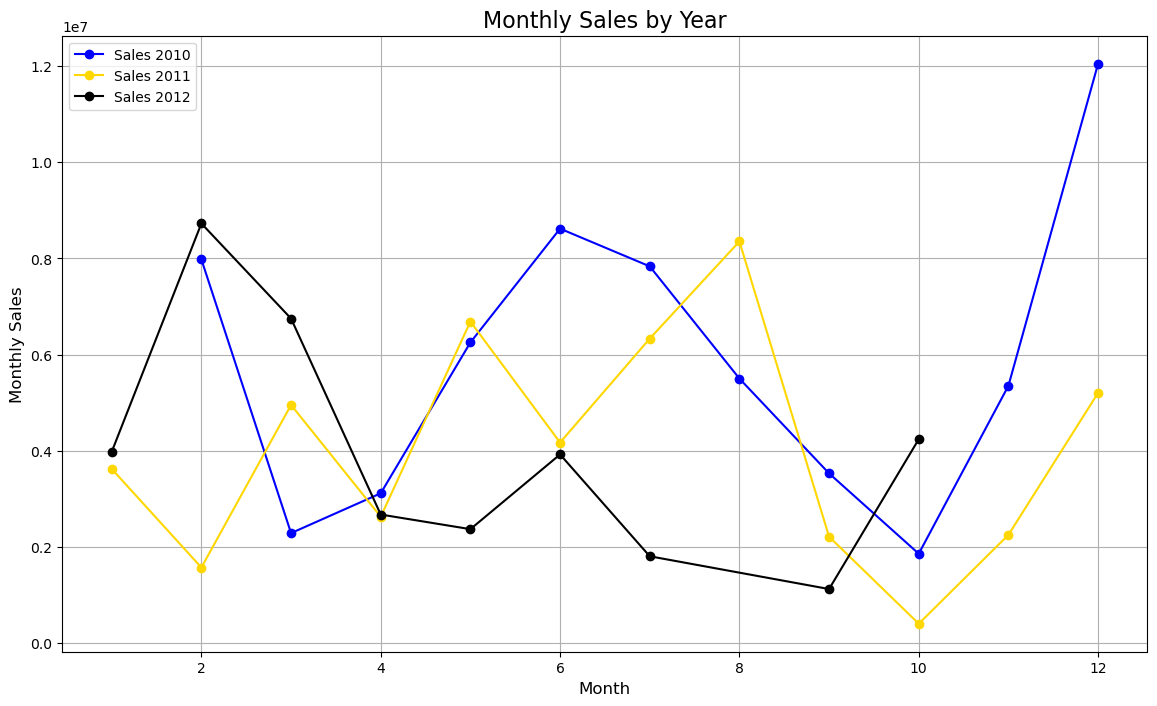

In [11]:
monthly_sales = walmart_df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))
plt.figure(figsize=(14, 8))

plt.figure(figsize=(14, 8))
years_to_plot = [2010, 2011, 2012]
colors = ['b', 'gold', 'black']

for i, year in enumerate(years_to_plot):
    yearly_sales = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(yearly_sales['Month'], yearly_sales['Weekly_Sales'], 
             marker='o', linestyle='-', color=colors[i], label=f'Sales {year}')

plt.title('Monthly Sales by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Monthly Sales', fontsize=12)
plt.grid(True)
plt.legend()

plt.show()

### Weekly sales by Store

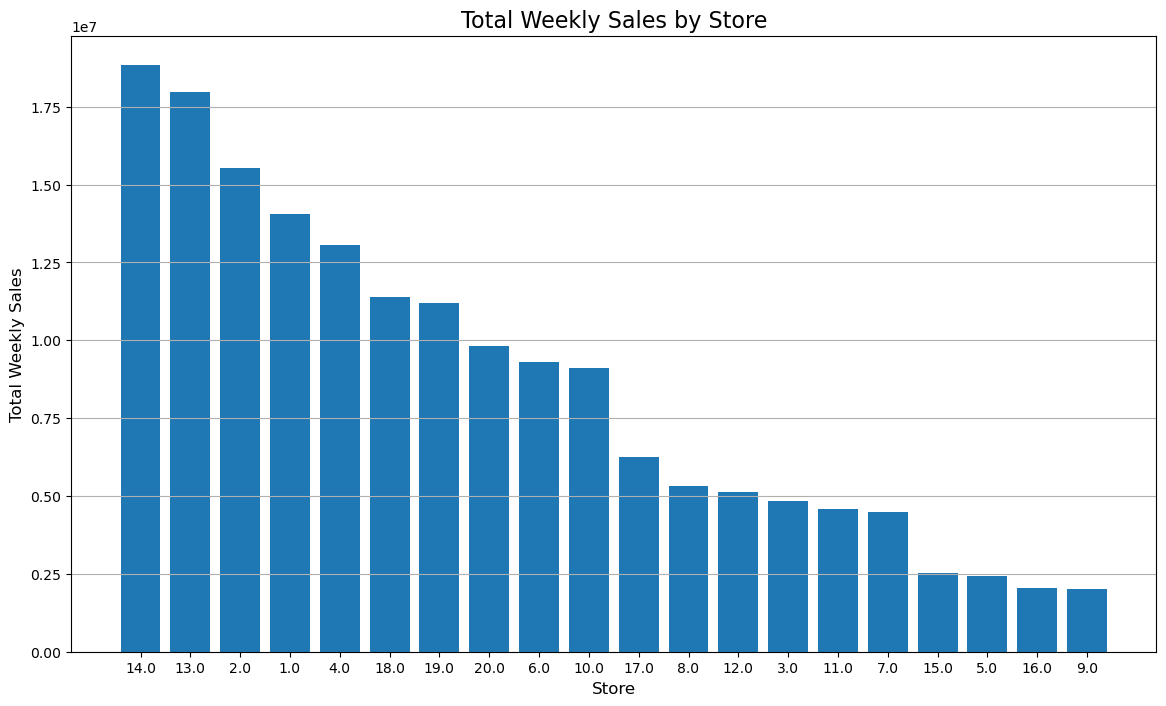

In [12]:
walmart_df['Store'] = walmart_df['Store'].astype(str)
store_sales = walmart_df.groupby('Store')['Weekly_Sales'].sum().reset_index()

store_sales = store_sales.sort_values(by='Weekly_Sales', ascending=False)
plt.figure(figsize=(14, 8))
plt.bar(store_sales['Store'], store_sales['Weekly_Sales'])

plt.title('Total Weekly Sales by Store', fontsize=16)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Weekly Sales', fontsize=12)
# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.show()

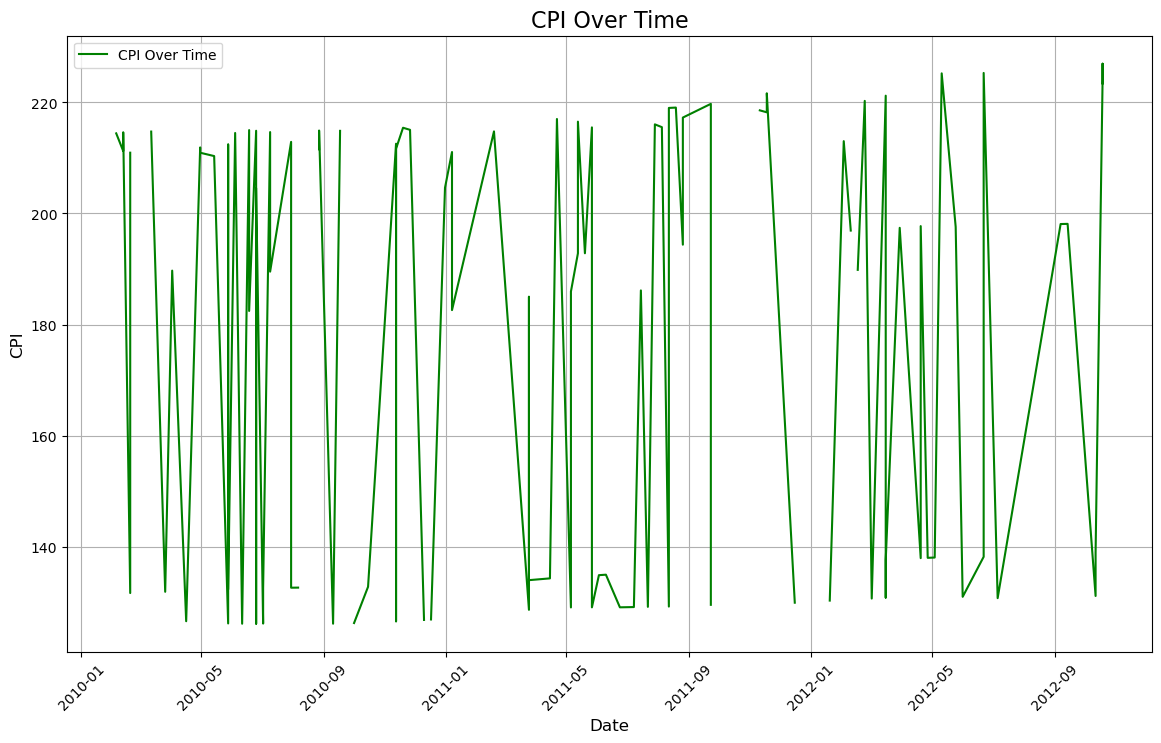

In [13]:
# CPI overtime
#walmart_df = walmart_df.sort_values(by='Date')
plt.figure(figsize=(14, 8))

plt.plot(walmart_df['Date'], walmart_df['CPI'], color='green', label='CPI Over Time')

plt.title('CPI Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CPI', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.show()

CLEANING 🧹

In [14]:
# considering that : every day is a Friday" and the date range is about 2 years and 8 months. We drop the columns that are not useful
walmart_data = walmart_df.drop(["Date", "Day", "Year", "Day_of_week", "Day_name", "Is_weekend"], axis=1)

In [15]:
# Let's drop row where there are missing values in target column
walmart_data.dropna(subset=['Weekly_Sales'], inplace=True)

In [19]:
walmart_data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
67,3.0,461622.22,0.0,45.71,2.572,214.424881,7.368,2.0
44,1.0,1641957.44,1.0,38.51,2.548,211.242170,8.106,2.0
107,8.0,994801.40,1.0,33.34,2.548,214.621419,6.299,2.0
115,15.0,660838.75,0.0,NaN,2.909,131.637000,NaN,2.0
112,2.0,2124451.54,0.0,39.69,2.514,210.945160,NaN,2.0


Missing Values

In [20]:
print(walmart_data.isnull().sum())
print()
print(walmart_data.isnull().sum() / len(walmart_data))

Store            0
Weekly_Sales     0
Holiday_Flag    11
Temperature     15
Fuel_Price      12
CPI             11
Unemployment    14
Month           18
dtype: int64

Store           0.000000
Weekly_Sales    0.000000
Holiday_Flag    0.080882
Temperature     0.110294
Fuel_Price      0.088235
CPI             0.080882
Unemployment    0.102941
Month           0.132353
dtype: float64


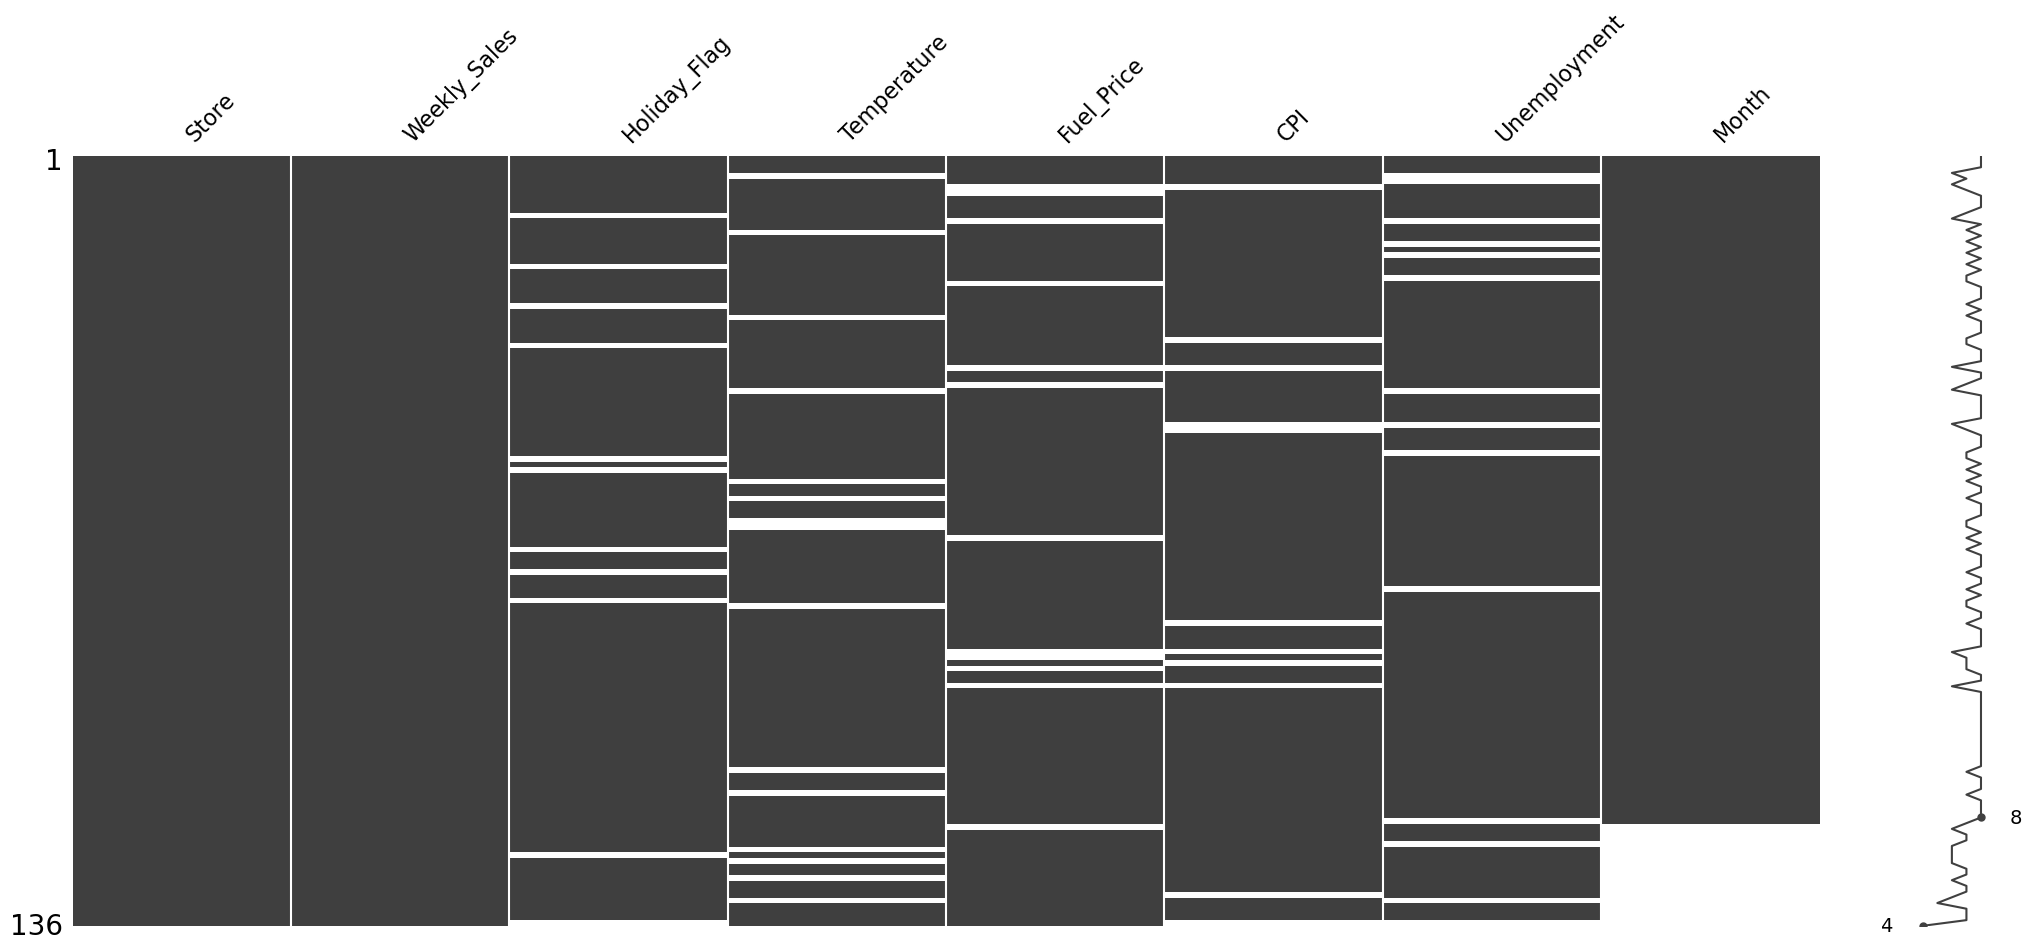

In [21]:
msno.matrix(walmart_data)
plt.show()

In [22]:
walmart_data.describe(include="all")

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
count,136,1.360000e+02,125.000000,121.000000,124.000000,125.000000,122.000000,118.000000
unique,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.249536e+06,0.072000,60.853967,3.316992,178.091144,7.665582,6.338983
std,NaN,6.474630e+05,0.259528,18.514432,0.479540,40.243105,1.619428,3.173664
min,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000,1.000000
25%,NaN,6.050757e+05,0.000000,45.220000,2.838500,131.637000,6.690000,4.000000
50%,NaN,1.261424e+06,0.000000,62.250000,3.451000,196.919506,7.477000,6.000000
75%,NaN,1.806386e+06,0.000000,75.950000,3.724000,214.878556,8.150000,9.000000


In [16]:
# Imputation
walmart_data['Temperature'] = walmart_data['Temperature'].fillna(walmart_data['Temperature'].median())  
walmart_data['Fuel_Price'] = walmart_data['Fuel_Price'].fillna(walmart_data['Fuel_Price'].median()) 
walmart_data['CPI'] = walmart_data['CPI'].fillna(walmart_data['CPI'].median()) 
walmart_data['Unemployment'] = walmart_data['Unemployment'].fillna(walmart_data['Unemployment'].median())  
walmart_data['Month'] = walmart_data['Month'].fillna(walmart_data['Month'].median())  
walmart_data['Holiday_Flag'] = walmart_data['Holiday_Flag'].fillna(walmart_data['Holiday_Flag'].mode()[0]) 

# any missing values?
print(walmart_data.isnull().sum())


Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
dtype: int64


Outliers

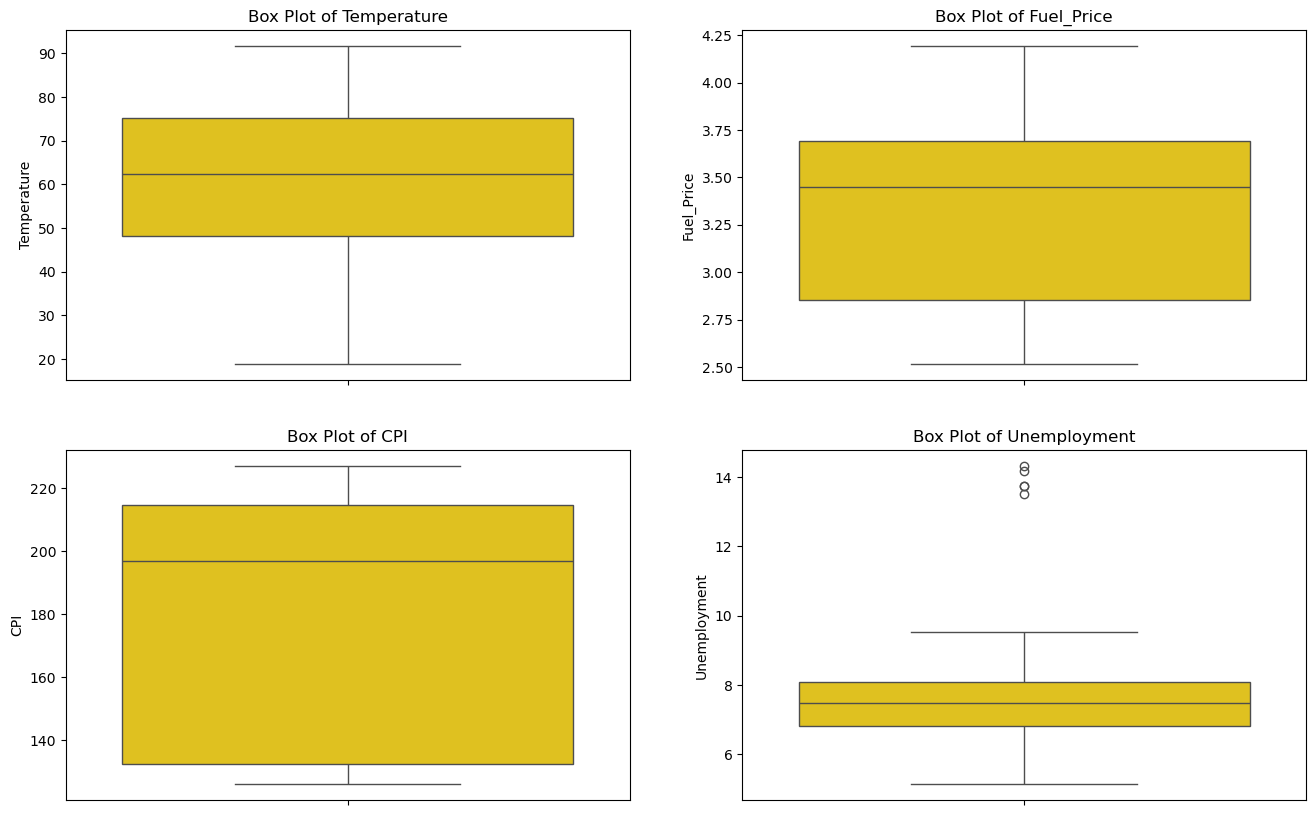

In [24]:
# Let's visualize the outliers
plt.figure(figsize=(16, 10))
#outlier_plt=plt.style.use('dark_background')


columns_to_check = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


for i, column in enumerate(columns_to_check):
    plt.subplot(2, 2, i + 1) 
    sns.boxplot(data=walmart_data, y=column, color="gold")
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.show()

In [25]:
# Droping outliers

for column in columns_to_check:
    mean = walmart_data[column].mean()
    std = walmart_data[column].std()
    
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    
    walmart_clean = walmart_data[(walmart_data[column] >= lower_bound) & (walmart_data[column] <= upper_bound)]

print(f"DataFrame shape before dropping outliers: {walmart_data.shape}")
print(f"DataFrame shape after dropping outliers: {walmart_clean.shape}")


DataFrame shape before dropping outliers: (136, 8)
DataFrame shape after dropping outliers: (131, 8)


In [26]:
walmart_clean.Holiday_Flag.value_counts()

Holiday_Flag
0.0    123
1.0      8
Name: count, dtype: int64

Distibution


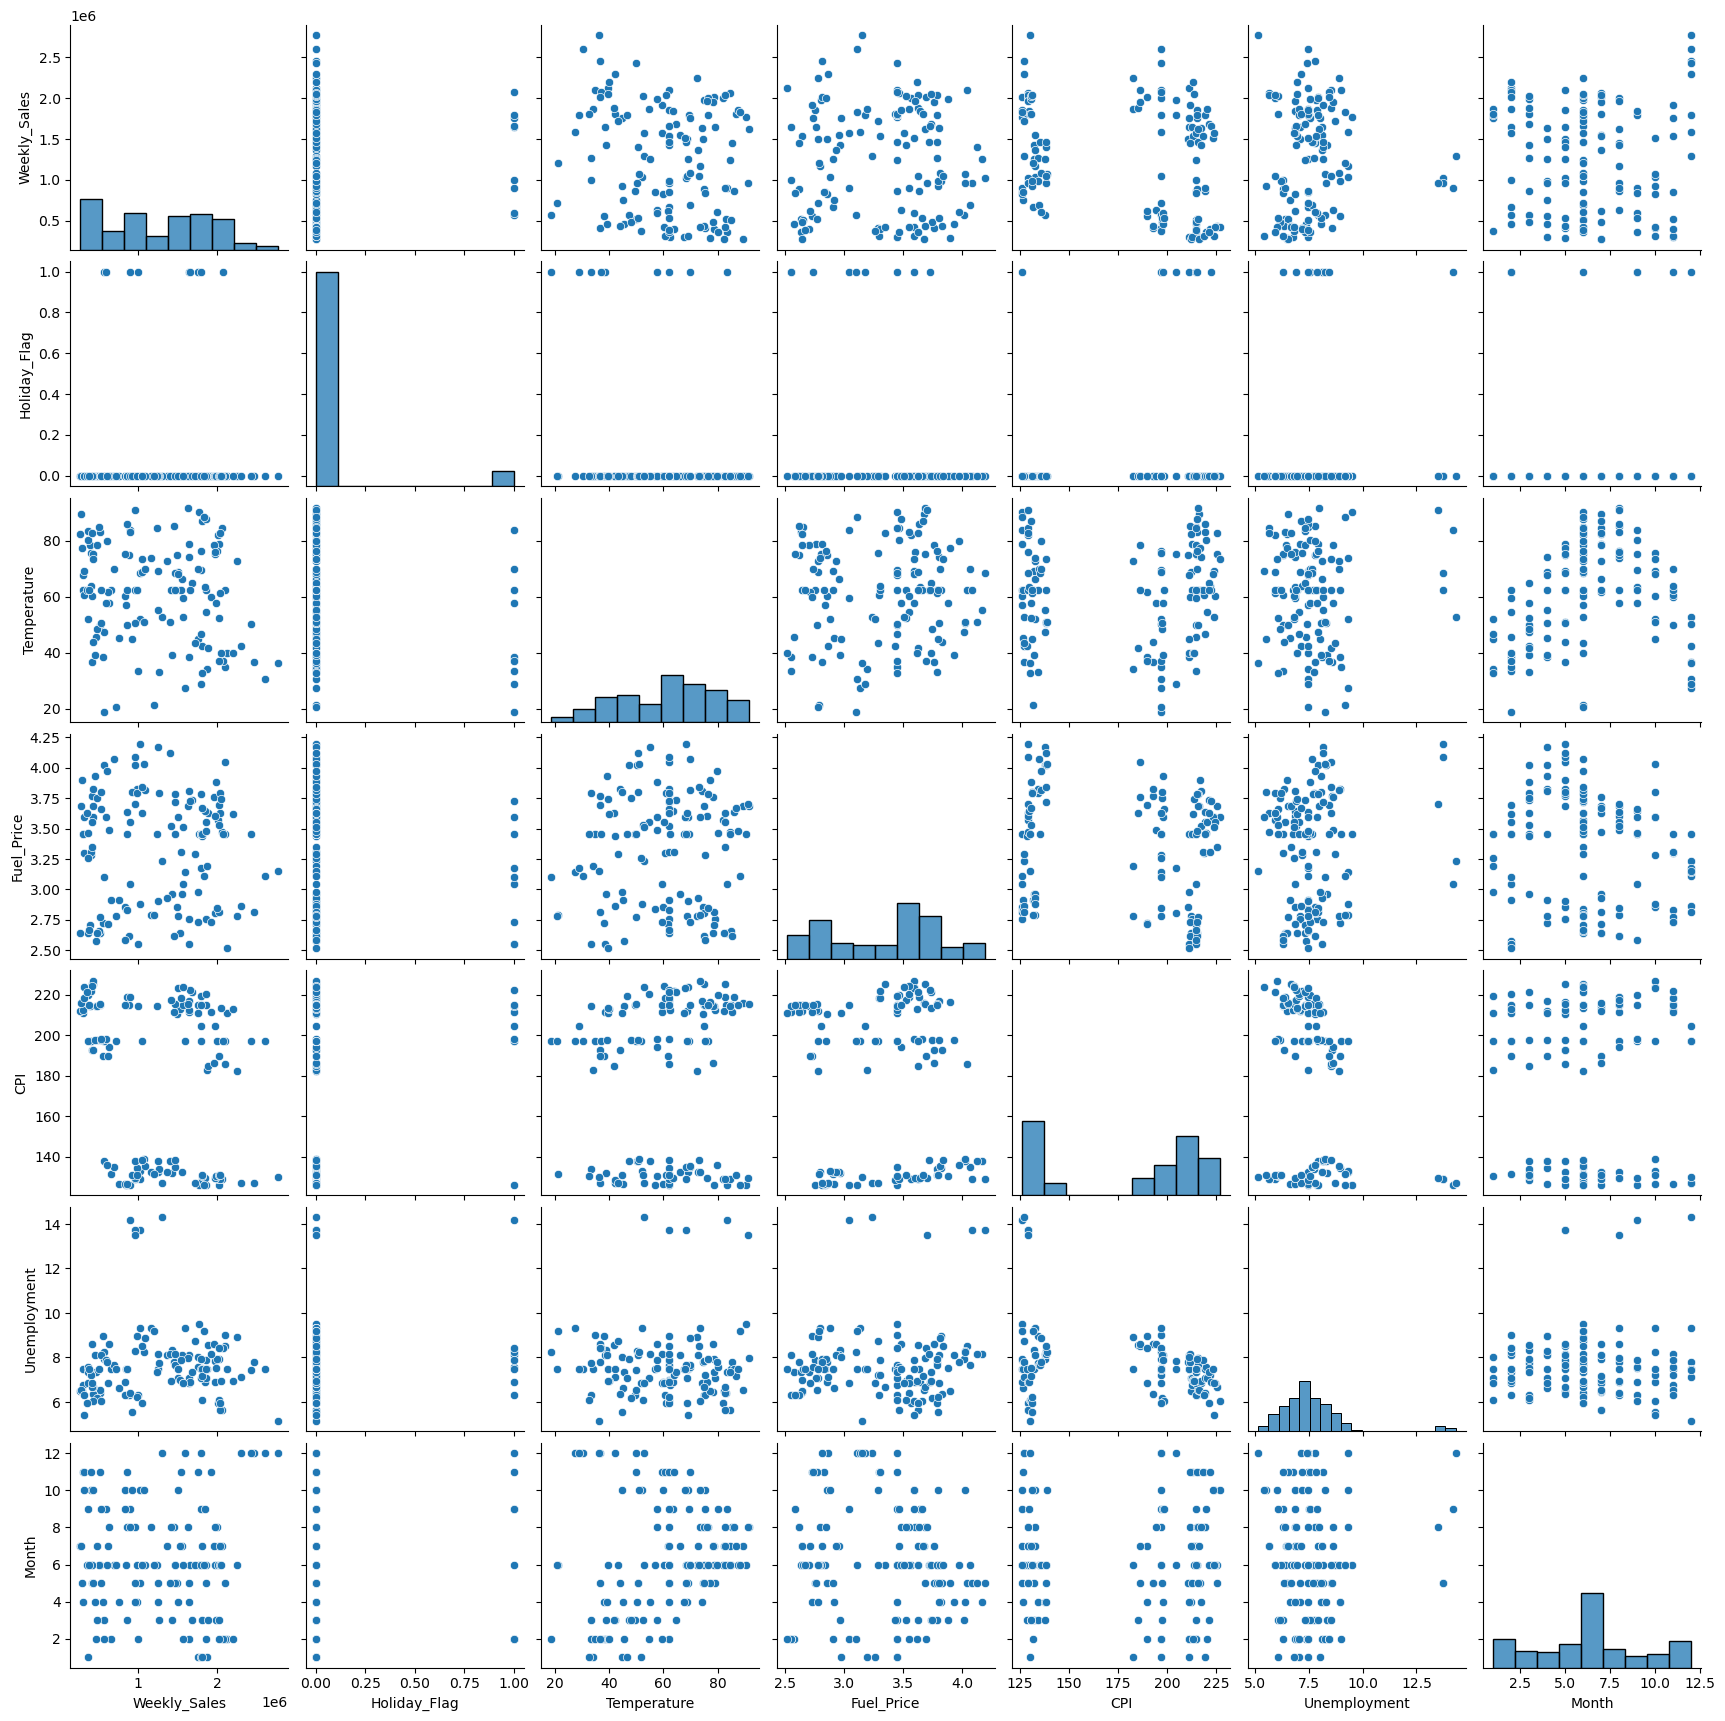

In [27]:
sns.pairplot(walmart_data)

In [28]:
walmart_data.corr(numeric_only=True)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
Weekly_Sales,1.000000,0.034454,-0.160952,-0.008120,-0.246497,0.053407,-0.013169
Holiday_Flag,0.034454,1.000000,-0.202262,-0.130908,0.129345,0.121471,-0.016538
Temperature,-0.160952,-0.202262,1.000000,0.027148,0.070561,0.000982,0.226039
Fuel_Price,-0.008120,-0.130908,0.027148,1.000000,-0.158866,0.084745,-0.124540
CPI,-0.246497,0.129345,0.070561,-0.158866,1.000000,-0.329616,-0.022130
Unemployment,0.053407,0.121471,0.000982,0.084745,-0.329616,1.000000,0.020568
Month,-0.013169,-0.016538,0.226039,-0.124540,-0.022130,0.020568,1.000000


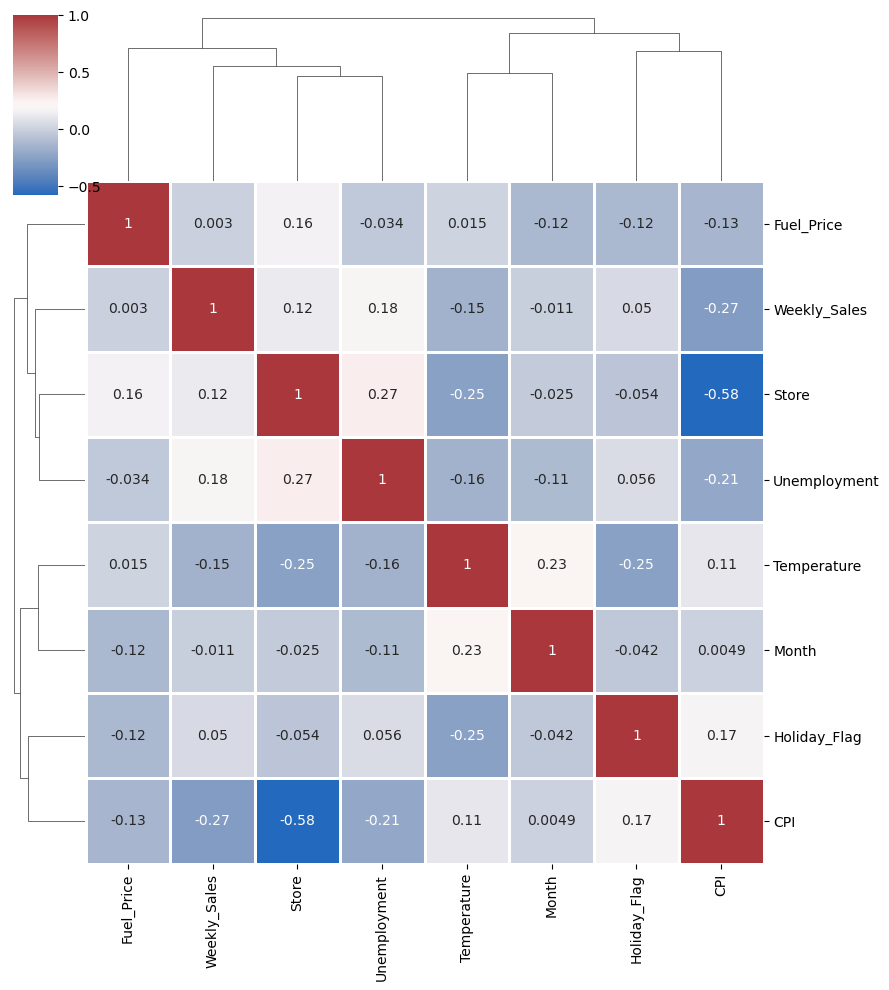

In [29]:
sns.clustermap(walmart_clean.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

Preprocessing

In [30]:
print("Separating labels from features...")
target_variable = "Weekly_Sales"

X = walmart_clean.drop(target_variable, axis = 1)
Y = walmart_clean.loc[:,target_variable]

print("...Done.")


Separating labels from features...
...Done.


In [31]:
numeric_features = ['Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Month']
categorical_features = ["Store", "Holiday_Flag"]

In [32]:
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [33]:
numeric_transformer = StandardScaler()
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) 
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [34]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Linear regression

In [35]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [36]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[1913626.31537611  204814.83897328  384234.66119102 1315880.39447236
  808243.25204231 1991615.47978263 1444577.04215545  350963.02140251
 2211035.19693981 1201548.9246801  2050014.46473376  969924.54128983
  476456.81094987  694678.44597157 1658489.26436449  793678.28131312
  421366.30794585 1422930.56132401  482240.57153982 2031819.82853621
 1204604.51418342 1984665.44988956 2064912.6823852   509801.57439531
  557426.59728383  378235.09962948 1188187.6901084   119779.97544295
  390374.28122871 1356798.59249431 1042513.07297165  294878.49867699
 2078764.55022278  607131.40068419  631243.78195894 1608604.0751322
 1446070.52085493  473188.36804133  601267.53721257  670390.17466483
 2011538.59878486  796455.20551161 1192886.76996069 2056836.08419064
 2060301.65554836 1531577.24965481  595255.65763829  394190.40256933
  928778.86097815 1655699.96356059  959475.35657732  356801.63410221
  954883.887885   1964262.75928129 1597364.91910759 1093708.9944

In [37]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[ 510183.1892534  1465901.07099356 1916766.23136221  661978.84361335
  685191.09855096 1464227.2750295  2273969.14743443 1579624.41751855
  497352.40971495  520935.03024025  446812.99043379 1436188.28650125
 1688476.29267361  996613.93561563 1538577.90588303 2291529.82055094
 1932471.77978453 1461383.63636286  975467.15189935  173123.94778732
 1953401.81767849 2069827.27650339 1961103.95089665 1517476.60614781
 2178436.63430584  900913.19946754 2065813.13796134]



In [38]:
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9733097839034143
R2 score on test set :  0.9257501033099529


In [39]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [40]:

coefficients = regressor.coef_
num_features = numeric_features
cat_features = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)

all_feature_names = np.concatenate([num_features, cat_features])

coeff_df = pd.DataFrame(coefficients, all_feature_names, columns=['Coefficient'])


print(coeff_df)

                   Coefficient
Temperature      -4.764093e+04
Fuel_Price       -4.943486e+04
CPI               7.633519e+04
Unemployment     -9.152016e+04
Month             6.646061e+04
Store_10.0        5.993229e+05
Store_11.0       -1.120910e+05
Store_13.0        5.975851e+05
Store_14.0        7.115164e+05
Store_15.0       -6.445401e+05
Store_16.0       -1.097189e+06
Store_17.0       -6.464993e+05
Store_18.0       -1.902167e+05
Store_19.0        9.770458e+04
Store_2.0         4.053461e+05
Store_20.0        4.445178e+05
Store_3.0        -1.206453e+06
Store_4.0         6.170263e+05
Store_5.0        -1.354440e+06
Store_6.0        -4.283855e+04
Store_7.0        -9.387737e+05
Store_8.0        -8.270367e+05
Store_9.0        -1.186337e+06
Holiday_Flag_1.0  6.225991e+04


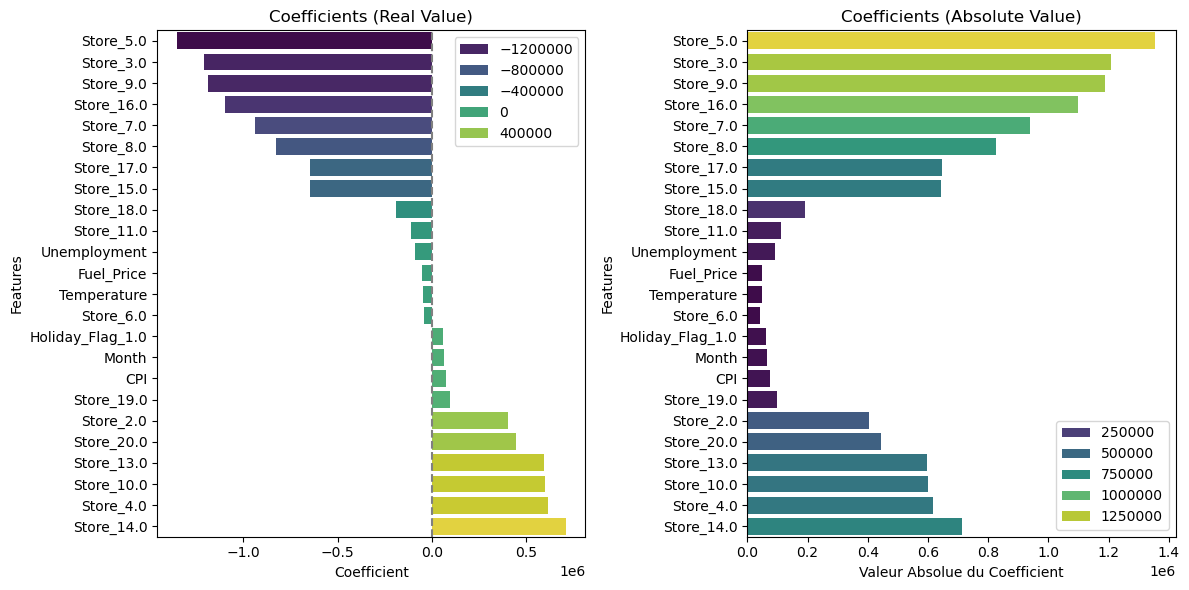

In [41]:

coeff_df = coeff_df.sort_values(by='Coefficient')  
feature_names = coeff_df.index  
coeff_values = coeff_df['Coefficient'].values 


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.barplot(x=coeff_values, y=feature_names,hue=coeff_values, palette='viridis')
plt.axvline(0, color='gray', linestyle='--') 
plt.title('Coefficients (Real Value)')
plt.xlabel('Coefficient')
plt.ylabel('Features')


plt.subplot(1, 2, 2)
sns.barplot(x=np.abs(coeff_values), y=feature_names,hue=np.abs(coeff_values), palette='viridis')
plt.title('Coefficients (Absolute Value)')
plt.xlabel('Valeur Absolue du Coefficient')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

## Regularization

# Ridge

In [42]:
# grid search
print("Grid search...")
regressor_r = Ridge()

params = {
    'alpha': [0.0, 0.00001, 0.00002, 0.00003, 0.1, 0.5, 1.0, 10, 100]
}
gridsearch_r = GridSearchCV(regressor_r, param_grid = params, cv = 5) 
gridsearch_r.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch_r.best_params_)
print("Best R2 score train : ", gridsearch_r.best_score_)
print("Best R2 score test : ", gridsearch_r.score(X_test, Y_test))

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.1}
Best R2 score train :  0.9287927130658342
Best R2 score test :  0.9253265177053518


In [43]:
print("R2 score on training set : ", gridsearch_r.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch_r.score(X_test, Y_test))

R2 score on training set :  0.9720674533949666
R2 score on test set :  0.9253265177053518


# Lasso

In [44]:

regressor_l = Lasso()
params = {
    'alpha': [0.1, 0.0000001, 0.5, 1.0, 10, 100, 200, 300, 350]
}
gridsearch_lasso = GridSearchCV(regressor_l, param_grid=params, cv=5)
gridsearch_lasso.fit(X_train, Y_train)

print("Meilleur hyperparamètre pour Lasso : ", gridsearch_lasso.best_params_)
print("Meilleur R2 score pour Lasso  : ", gridsearch_lasso.best_score_)
print("Meilleur R2 score pour Lasso : ", gridsearch_lasso.score(X_test, Y_test))

Meilleur hyperparamètre pour Lasso :  {'alpha': 350}
Meilleur R2 score pour Lasso  :  0.9296024401249486
Meilleur R2 score pour Lasso :  0.9290734682615852


In [45]:
gridsearch_lasso.score(X_train, Y_train)

0.9730240752057595

## Performance

In [46]:
y_pred_lr_train = regressor.predict(X_train)     
y_pred_lr_test = regressor.predict(X_test)      

y_pred_ridge_train = gridsearch_r.predict(X_train)  
y_pred_ridge_test = gridsearch_r.predict(X_test)   

y_pred_lasso_train = gridsearch_lasso.predict(X_train) 
y_pred_lasso_test = gridsearch_lasso.predict(X_test)   

metrics = {
    'Model': ['Linear Regression', 'Linear Regression', 'Ridge', 'Ridge', 'Lasso', 'Lasso'],
    'Data Set': ['Train', 'Test', 'Train', 'Test', 'Train', 'Test'],
    'R²': [
        r2_score(Y_train, y_pred_lr_train),
        r2_score(Y_test, y_pred_lr_test),
        r2_score(Y_train, y_pred_ridge_train),
        r2_score(Y_test, y_pred_ridge_test),
        r2_score(Y_train, y_pred_lasso_train),
        r2_score(Y_test, y_pred_lasso_test)
    ],
    'MSE': [
        mean_squared_error(Y_train, y_pred_lr_train),
        mean_squared_error(Y_test, y_pred_lr_test),
        mean_squared_error(Y_train, y_pred_ridge_train),
        mean_squared_error(Y_test, y_pred_ridge_test),
        mean_squared_error(Y_train, y_pred_lasso_train),
        mean_squared_error(Y_test, y_pred_lasso_test)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(Y_train, y_pred_lr_train)),
        np.sqrt(mean_squared_error(Y_test, y_pred_lr_test)),
        np.sqrt(mean_squared_error(Y_train, y_pred_ridge_train)),
        np.sqrt(mean_squared_error(Y_test, y_pred_ridge_test)),
        np.sqrt(mean_squared_error(Y_train, y_pred_lasso_train)),
        np.sqrt(mean_squared_error(Y_test, y_pred_lasso_test))
    ],
    'MAE': [
        mean_absolute_error(Y_train, y_pred_lr_train),
        mean_absolute_error(Y_test, y_pred_lr_test),
        mean_absolute_error(Y_train, y_pred_ridge_train),
        mean_absolute_error(Y_test, y_pred_ridge_test),
        mean_absolute_error(Y_train, y_pred_lasso_train),
        mean_absolute_error(Y_test, y_pred_lasso_test)
    ],
}

metrics_df = pd.DataFrame(metrics)
metrics_df


,Model,Data Set,R²,MSE,RMSE,MAE
0,Linear Regression,Train,0.973310,1.208704e+10,109941.062335,87941.100462
1,Linear Regression,Test,0.925750,2.470464e+10,157177.095716,115399.214405
2,Ridge,Train,0.972067,1.264964e+10,112470.635776,88674.763517
3,Ridge,Test,0.925327,2.484558e+10,157624.795130,113814.968768
4,Lasso,Train,0.973024,1.221642e+10,110527.934759,87735.933934
5,Lasso,Test,0.929073,2.359888e+10,153619.269175,111964.311997


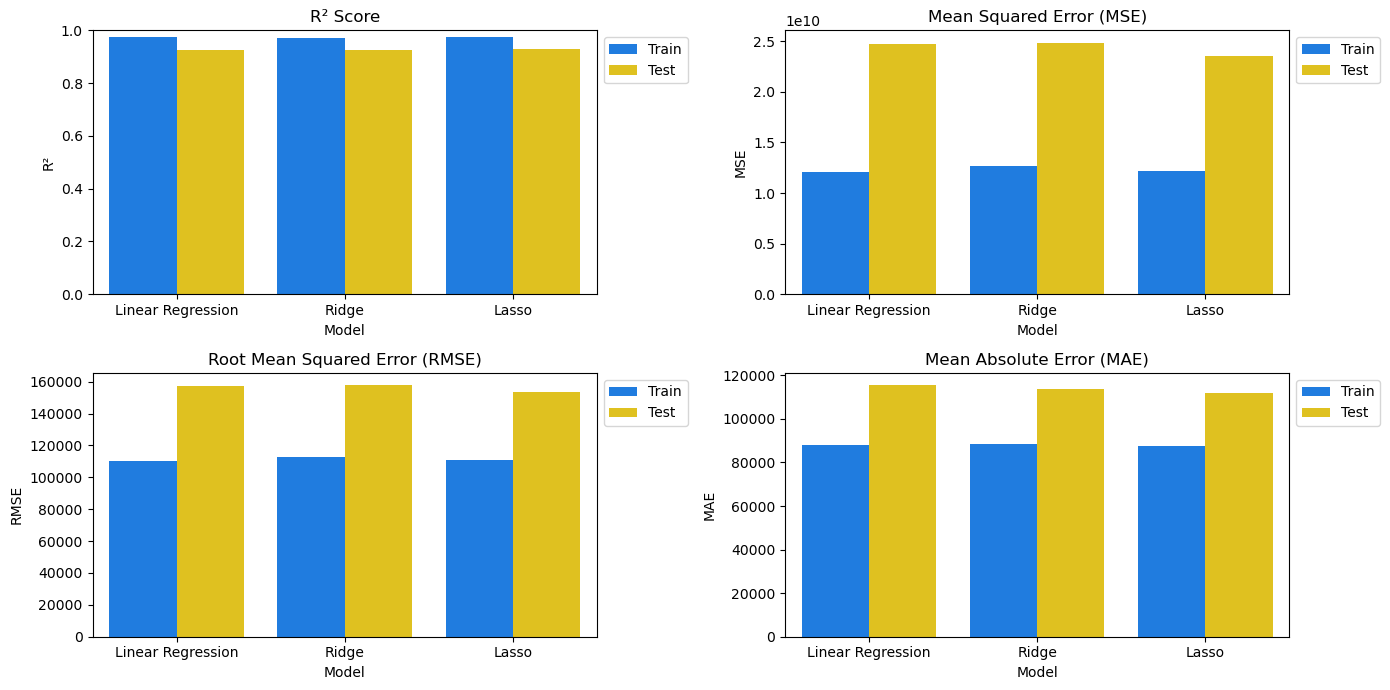

In [47]:
plt.figure(figsize=(14, 7))
palette = ["#007bff", "#ffd700"]

plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='R²', hue='Data Set', data=metrics_df, palette = palette)
plt.title('R² Score')
plt.ylim(0, 1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Plot pour MSE
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='MSE', hue='Data Set', data=metrics_df, palette = palette)
plt.title('Mean Squared Error (MSE)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Plot pour RMSE
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='RMSE', hue='Data Set', data=metrics_df, palette = palette)
plt.title('Root Mean Squared Error (RMSE)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Plot pour MAE
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='MAE', hue='Data Set', data=metrics_df, palette = palette)
plt.title('Mean Absolute Error (MAE)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()